# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شمارش سکه</div>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تلاش اولیه!</div>

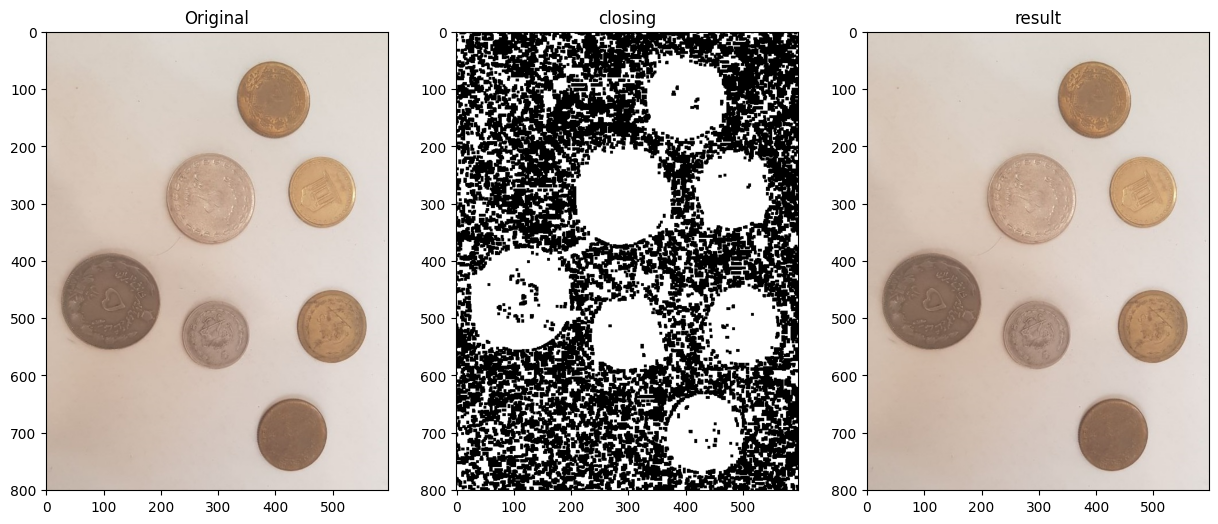

In [9]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("D:/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
if len(cnt) >= 5:  # fitEllipse needs at least 5 points
    ellipse = cv2.fitEllipse(cnt)
    if ellipse[1][0] > 0 and ellipse[1][1] > 0:  # width and height of ellipse
        cv2.ellipse(drawing_image, ellipse, (0, 255, 0), 2)


plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">حذف نویز پس زمینه</div>

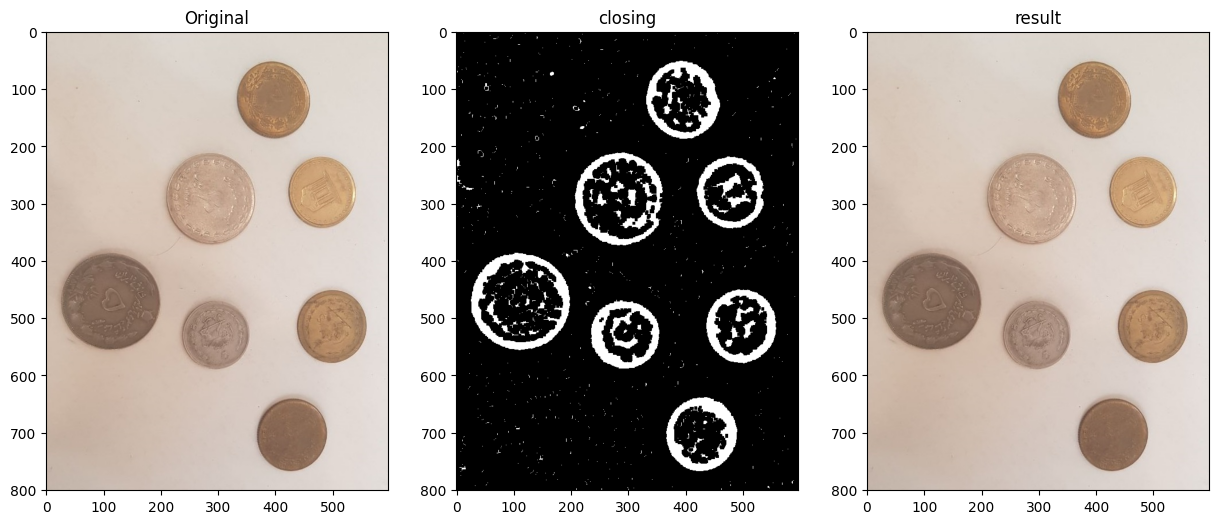

In [11]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("D:/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
if len(cnt) >= 5:  # fitEllipse needs at least 5 points
    ellipse = cv2.fitEllipse(cnt)
    if ellipse[1][0] > 0 and ellipse[1][1] > 0:  # width and height of ellipse
        cv2.ellipse(drawing_image, ellipse, (0, 255, 0), 2)


plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شرط تعداد نقاط contour!</div>

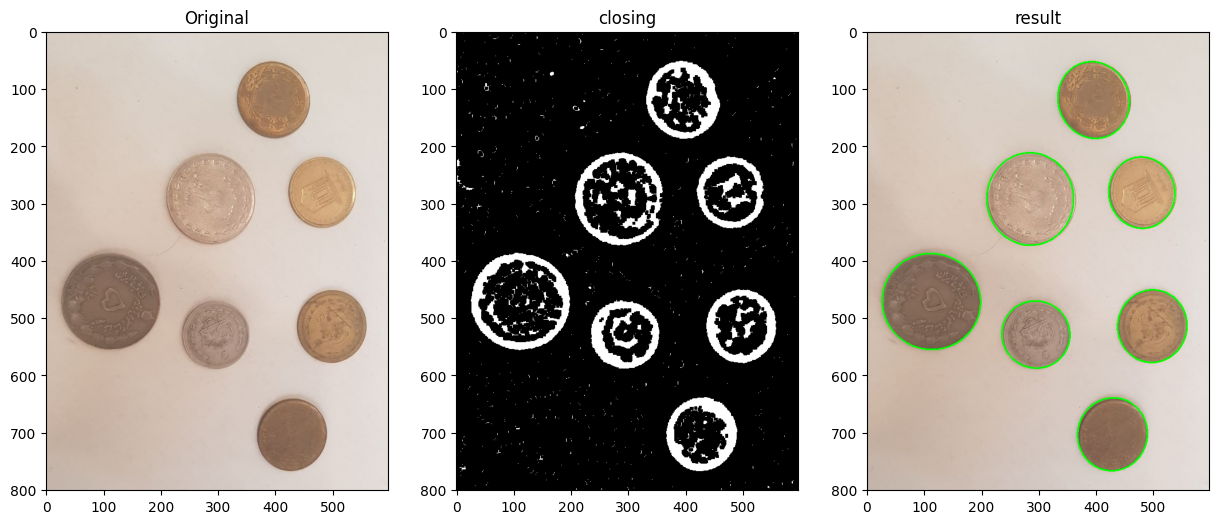

In [12]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("D:/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    if len(cnt) < 100: #100 is more probable to be a circle!
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">یا شرط مساحت کانتور!</div>

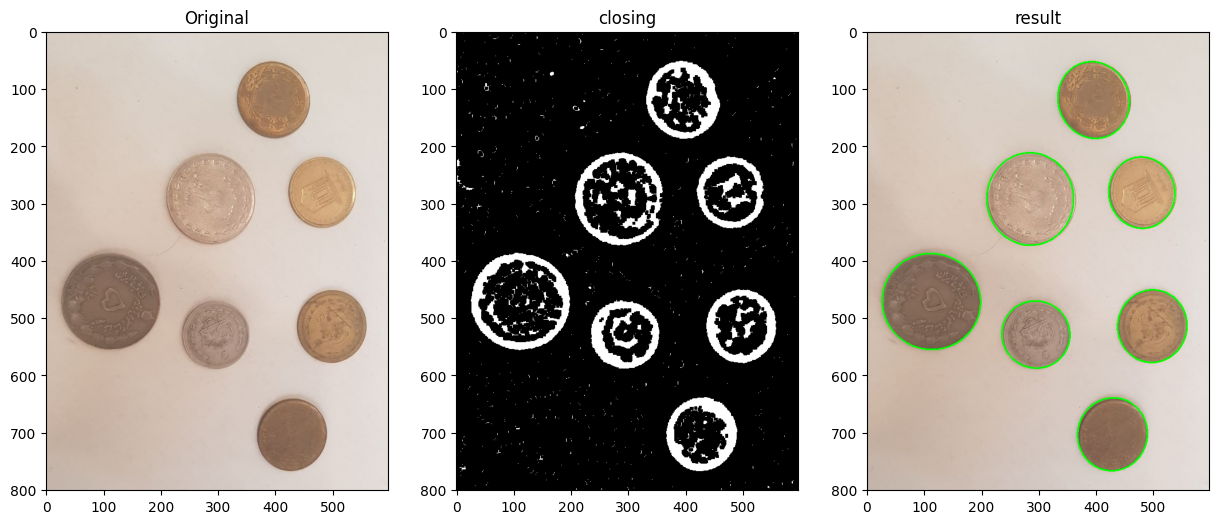

In [13]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("D:/old-iranian-coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 5000 or area > 50000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی نتیجه روی عکسهای دیگر</div>

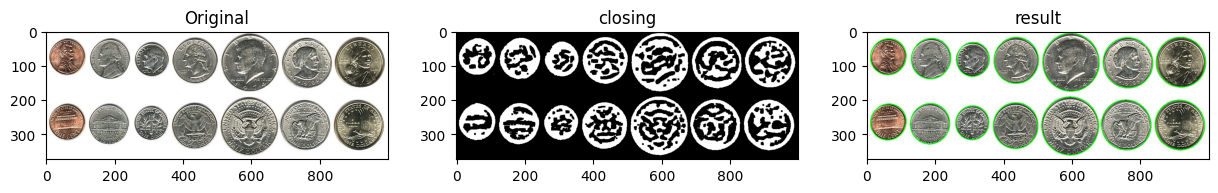

In [14]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("D:/money.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 5000 or area > 50000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

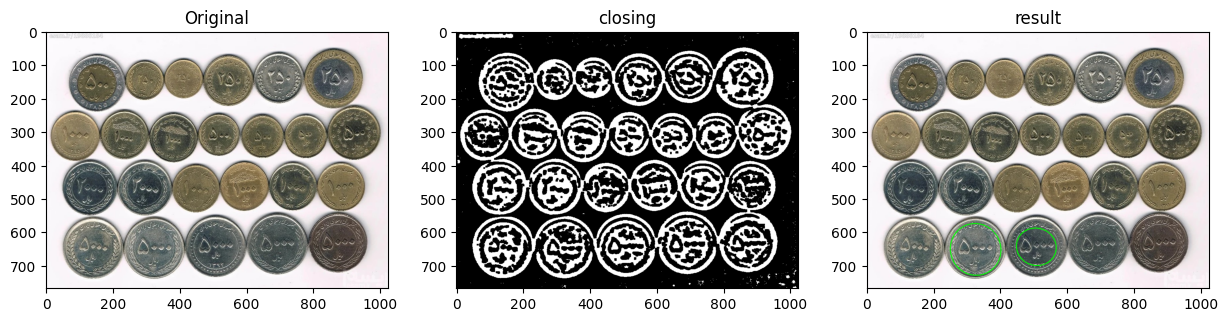

In [15]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("D:/iranian-coin.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (31, 31), 0) #Noise removal
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 1)

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)
        
drawing_image = image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 5000 or area > 50000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(drawing_image, ellipse, (0,255,0), 2)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(closing, cmap='gray');plt.title("closing");
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("result");

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">به نظرتون مشکل روی تصویر بالا چیست؟ میتوانید مشکل را رفع کنید؟!</div>